In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models

## Define model

wow, very complicated transfer learning...

In [ ]:
def load_model():

    # $CHALLENGIFY_BEGIN

    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)

    # $CHALLENGIFY_END

    return model

In [ ]:
model = load_model()
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

set model as not trainable, cuz it's massive

In [ ]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False

    return model

In [ ]:
model = set_nontrainable_layers(model)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### Actually build the model

Thx for all your patience

In [ ]:
def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(14, activation='softmax')


    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [ ]:
model = add_last_layers(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 500)               16384500  
                                                                 
 dense_3 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


## Compile VGG16 + layers

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN
    model = load_model()
    model = add_last_layers(model)

    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  weighted_metrics=['f1_score', 'accuracy'])

    return model
    # $CHALLENGIFY_END

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 500)               16384500  
                                                                 
 dense_5 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


### !!!!!!!!!!!!!!! Use of keras VGG16 preprocessor ????????????

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

❓ **Question: preprocessing the dataset** ❓

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

### Fit the model

Do we like the earlystopping criteria

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=16,
                    callbacks=[es])

Epoch 1/50
36/36 [==============================] - 13s 238ms/step - loss: 3.2015 - accuracy: 0.7916 - val_loss: 1.1974 - val_accuracy: 0.9162
Epoch 2/50
36/36 [==============================] - 4s 112ms/step - loss: 0.0728 - accuracy: 0.9912 - val_loss: 1.1768 - val_accuracy: 0.9106
Epoch 3/50
36/36 [==============================] - 4s 125ms/step - loss: 0.0299 - accuracy: 0.9965 - val_loss: 1.3729 - val_accuracy: 0.9218
Epoch 4/50
36/36 [==============================] - 5s 127ms/step - loss: 3.9962e-06 - accuracy: 1.0000 - val_loss: 1.2523 - val_accuracy: 0.9330
Epoch 5/50
36/36 [==============================] - 4s 124ms/step - loss: 3.6615e-05 - accuracy: 1.0000 - val_loss: 1.2491 - val_accuracy: 0.9330
Epoch 6/50
36/36 [==============================] - 4s 123ms/step - loss: 8.3160e-06 - accuracy: 1.0000 - val_loss: 1.2486 - val_accuracy: 0.9330
Epoch 7/50
36/36 [==============================] - 4s 125ms/step - loss: 5.3588e-06 - accuracy: 1.0000 - val_loss: 1.2483 - val_accura

### Plot accuracy

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

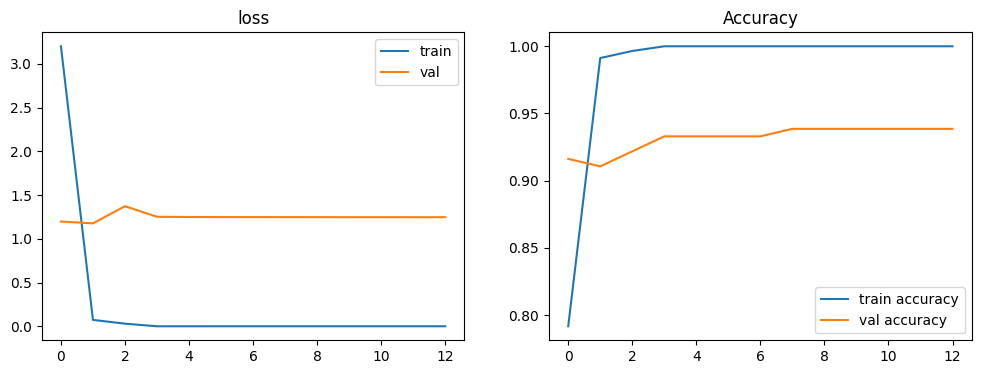

In [ ]:
plot_history(history)

### Evaluate

In [ ]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')



5/5 [==============================] - 9s 1s/step - loss: 2.5281 - accuracy: 0.8792
test_accuracy_vgg = 88.0 %
test_accuracy = 71.0 %
Chance level: 33.3%
